# Ice Cream Parlor

class IceCreamOrder
---

In [1]:
import random
import time

class IceCreamOrder:
#Constructor
    def __init__(self):
        #The order number
        self.orderNum = 1
        #The number of scoops in the order, which can be 1, 2, or 3 scoops
        #Defaulting as 1, but will randomly generated for each order
        self.scoops = 1
        
        #Options at the Ice Cream Parlor
        self.listOfFlavors = ["Vanilla", "Chocolate", "Strawberry"]
        self.listOfToppings = ["Sprinkles", "Chocolate Chips", "Cherry", "No Topping"]
        self.listOfConesAndCup = ["Waffle Cone", "Cake Cone", "Cup"]
        
        #Default Order
        self.orderFlavors = ["", "", ""]
        self.orderToppings = ["", "", ""]
        self.orderContainer = ""
        
#Method: Get the randomly generated ice cream order
    def takeOrder(self):
        #Get the number of scoops
        self.scoops = random.randrange(1,4)
        #Get what the ice cream is put in
        self.orderContainer = random.choice(self.listOfConesAndCup)
        #Get each scoop of ice cream and its topping
        for x in range(3):
            #Will always get at least one scoop of ice cream
            self.orderFlavors[x] = random.choice(self.listOfFlavors)
            self.orderToppings[x] = random.choice(self.listOfToppings)
            #A cherry can only go on the top scoop (when x = 0)
            while x != 0:
                if self.orderToppings[x] == "Cherry":
                    self.orderToppings[x] = random.choice(self.listOfToppings)
                else:
                    break
            #Stop when the predetermined number of scoops are generated
            if x == self.scoops - 1:
                break

#Method: Print the order
    def printOrder(self):
        #Instructions on how the ice cream scoops are stacked
        if self.orderNum == 1:
            print('Scoops are listed from top to bottom. Ex. Scoop 1 is the TOP scoop.\n')
        else:
            #Wait for 5 seconds between orders
            print('\nTaking the next order...\n')
            time.sleep(5)
        #Print top of the order
        #Includes: orderNum, number of scoops, and what the ice cream will be put in
        if self.scoops == 1:
            print(
                f'Order #{self.orderNum}: {self.scoops} scoop in a {self.orderContainer.upper()} ↓'
            )
        else:
            print(f'Order #{self.orderNum}: {self.scoops} scoops in a {self.orderContainer.upper()} ↓')
        #For each scoop, print the ice cream flavor and the topping ('No Topping' if no topping)
        print('#. Flavor \t    \t Topping')
        #Get the order and print it
        for x in range(3):
            #An iteration loop to print the order
            if self.orderToppings[x] == "Cherry":
                print(f'{x + 1}. {self.orderFlavors[x]} \twith\t a {self.orderToppings[x]}')
            else: 
                print(f'{x + 1}. {self.orderFlavors[x]} \twith\t {self.orderToppings[x]}')
            #Exit the for loop when the requested number of scoops are created
            #x is (0,3) and scoops can be (1,4), 
            #so scoops - 1 can be used to check if it is equal to x
            if x == self.scoops - 1:
                #Increase orderNum 
                self.orderNum += 1
                break
                

Using class IceCreamOrder
---

In [ ]:
from IceCreamOrder import *

order = IceCreamOrder()
order.takeOrder()
order.printOrder()
order.scoopImage()
order.takeOrder()
order.printOrder()
order.scoopImage()
get_concat_v_resize(order.scoopImages[0], order.scoopImages[1]).show 

GUI for Ice Cream Parlor
---

In [ ]:
import sys
from PyQt6.QtWidgets import QApplication, QMainWindow, QPushButton
from PyQt6.QtGui import QPixmap
from PyQt6.QtCore import QLineF 

# Subclass QMainWindow to customize your application's main window
class MainWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        
        self.setWindowTitle("Ice Cream Parlor")
        
        button      = QPushButton(self)
        button.setGeometry(50, 50, 200, 100)

        # Replace 'path_to_image' with the path to your image file
        image_path  = 'path_to_image'
        pixmap = QPixmap(image_path)

        if pixmap.isNull():
            print("Error loading image")
        else:
            button.setIcon(pixmap)
            button.setIconSize(pixmap.size())
        
        # Set the central widget of the Window
        self.setCentralWidget(self.button)
        
    def the_button_was_released(self):
        self.button_is_checked = self.button.isChecked()
        print(self.button_is_checked)

app     = QApplication(sys.argv)

window  = MainWindow()
window.show()

app.exec()

Obtain the image for each ice cream scoop
---

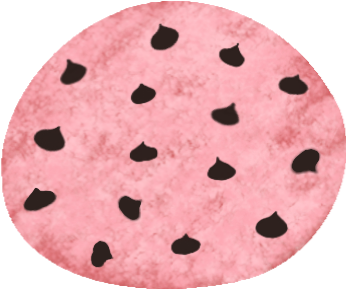

In [3]:
from PIL import Image
# Test with these
#Flavors    ["Vanilla", "Chocolate", "Strawberry"]
#Toppings   ["Sprinkles", "Chocolate Chips", "Cherry", "No Topping"]

layer1 = Image.open('Strawberry.png')
layer2 = Image.open('Chocolate Chips.png')

#Compositing image using Image.paste
final1 = Image.new("RGBA", layer1.size)
final1.paste(layer1, (0,0), layer1)
final1.paste(layer2, (0,0), layer2)

#Compositing image using Image.alpha_composite
final2 = Image.new("RGBA", layer1.size)
final2 = Image.alpha_composite(final2, layer1)
final2 = Image.alpha_composite(final2, layer2)

final2.show()

Vertical stack of images
---

Scoops are listed from top to bottom. Ex. Scoop 1 is the TOP scoop.

Order #1: 1 scoop in a CUP ↓
#. Flavor 	    	 Topping
1. Vanilla 	with	 Sprinkles
Vanilla.png
Sprinkles.png


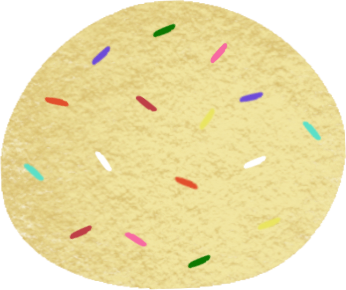

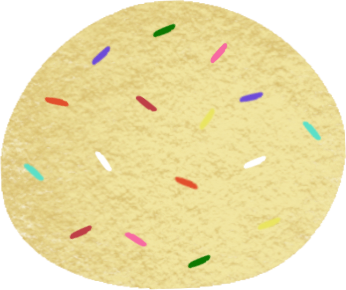

In [9]:
from IceCreamOrder import *
order = IceCreamOrder()
order.takeOrder()
order.printOrder()
order.scoopImage()
im2 = Image.open('WaffleCone2.png')
def get_concat_v_resize(im1, im2, resample=Image.BICUBIC, resize_big_image=True):
    if order.scoops == 1:
        return im1
    elif im1.width == im2.width:
        _im1 = im1
        _im2 = im2
    elif (((im1.width > im2.width) and resize_big_image) or
          ((im1.width < im2.width) and not resize_big_image)):
        _im1 = im1.resize((im2.width, int(im1.height * im2.width / im1.width)), resample=resample)
        _im2 = im2
    else:
        _im1 = im1
        _im2 = im2.resize((im1.width, int(im2.height * im1.width / im2.width)), resample=resample)
    dst = Image.new('RGB', (_im1.width, _im1.height + _im2.height))
    dst.paste(_im1, (0, 0))
    dst.paste(_im2, (0, _im1.height))
    return dst

display(get_concat_v_resize(order.scoopImages[0], im2))


#get_concat_h_resize(im1, im2).save('data/dst/pillow_concat_h_resize.jpg')
#get_concat_v_resize(im1, im2, resize_big_image=False).save('data/dst/pillow_concat_v_resize.jpg')